# Retail Corporation: Advanced Market Analysis

#### Disclaimer: These datasets are used as proxies to simulate US Retail consumer and market context due to the proprietary nature of internal corporate data.


## 🧪 **Methodology**
This study applies a hybrid analytical approach combining both **macro-level retail data** and **micro-level customer behavior data** to simulate Target’s strategic landscape. The goal is to examine market trends, segment customer groups, apply predictive modeling, and evaluate competitive positioning—all underpinned by real-world datasets and academic frameworks.

### 📍 **Data Sources**
**Kaggle Customer Segmentation Dataset**  
  A publicly available transactional dataset with variables representing customer purchases across product categories (e.g., Food %, Home %, Drinks %), discount utilization, order composition, and time-of-day preferences. While anonymized and not branded as Target-specific, the behavioral structure closely mirrors customer interactions typical of large U.S. retailers.

**Monthly Retail Trade Data (May 2025) – U.S. Census**  
  Official government report providing national retail sales figures, segmented by category and month. This enables contextual benchmarking for Target’s market participation relative to sector-wide trends.

*Disclaimer: These datasets are used as proxies to simulate Target’s consumer and market context due to the proprietary nature of internal corporate data.*

### 🔍 **Segmentation Technique**
Customer segmentation was conducted using **K-Means clustering**, a widely used unsupervised machine learning method, ideal for identifying spending patterns and time-based shopping behaviors.


In [1]:
# Step 1: Load Libraries 

# Core data tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Step 2: Load Datasets

# Load U.S. Census Retail May 2025 Report, all sheets
# Table 1 Monthly Sales
retail_sheet1 = pd.read_excel('/Users/ariba/OneDrive/.../RetailReport_May2025.xlsx', sheet_name=0) 
# Table 2 Percent Change
retail_sheet2 = pd.read_excel('/Users/ariba/OneDrive/.../RetailReport_May2025.xlsx', sheet_name=1)  
# Table 3 Sampling Error & Revision
retail_sheet3 = pd.read_excel('/Users/ariba/OneDrive/.../RetailReport_May2025.xlsx', sheet_name=2) 

# Strip extra spaces from column names
retail_sheet1.columns = retail_sheet1.columns.str.strip()

# Columns to clean
cols_to_clean = [
    'May_2025_', 'April_2025_', 'March_2025_',
    'May_2024_', 'April_2024_',
    'May_2025_SA', 'April_2025_SA', 'March_2025_SA',
    'May_2024_SA', 'April_2024_SA'
]

# Convert to numeric safely
retail_sheet1[cols_to_clean] = retail_sheet1[cols_to_clean].apply(pd.to_numeric, errors='coerce')
retail_sheet2.columns = retail_sheet2.columns.str.strip()
retail_sheet3.columns = retail_sheet3.columns.str.strip()

In [3]:
# convert percentages to numeric
cols_sheet2 = [
    'May2025_vs_Apr2025',
    'Apr2025_vs_Mar2025',
    'May2025_vs_May2024',
    'Q2_vs_Q1_2025',
    'May2025_vs_Feb2025',
    'May2025_vs_May2024_2'
]

retail_sheet2[cols_sheet2] = retail_sheet2[cols_sheet2].apply(pd.to_numeric, errors='coerce')
retail_sheet2.rename(columns={
    'May2025_vs_May2024_2': 'May2025_vs_May2024_YTD'
}, inplace=True)

In [4]:
# convert revision columns to numeric
cols_sheet3 = [
    'Standard_Error_pct',
    'MoM_Revision_pct',
    'Qtr_Revision_pct',
    'YoY_Revision_pct',
    'Avg_Revision_pct',
    'Absolute_Revision_pct'
]

retail_sheet3[cols_sheet3] = retail_sheet3[cols_sheet3].apply(pd.to_numeric, errors='coerce')

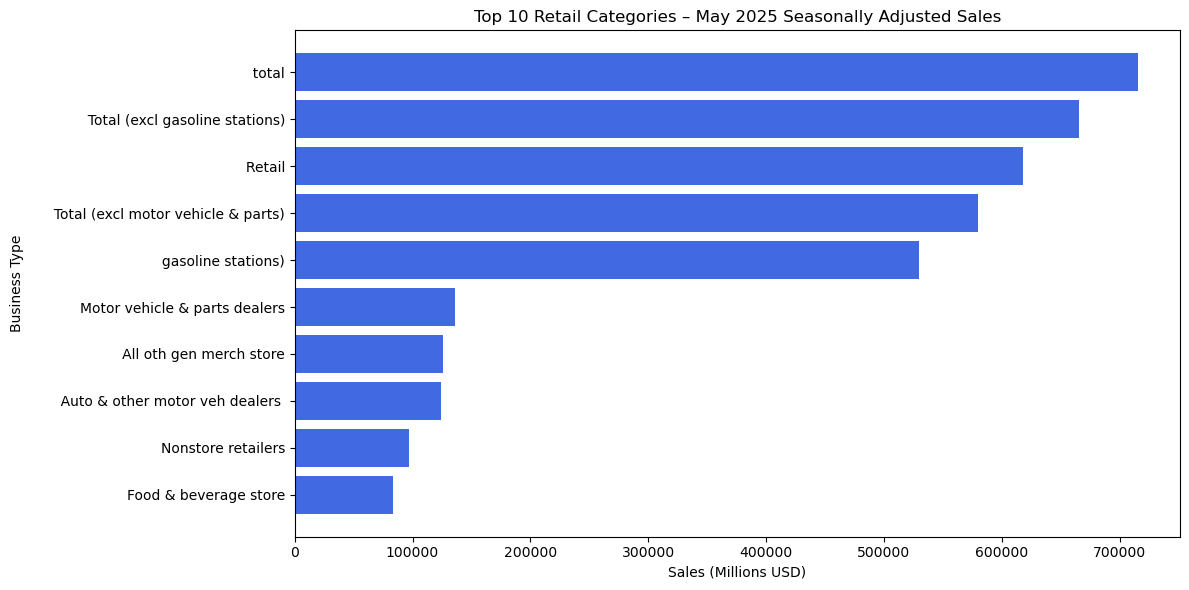

In [5]:
# Top categories by May 2025 (Seasonally Adjusted)
top_sales = retail_sheet1[['Business_Type', 'May_2025_SA']].dropna()
top_sales = top_sales.sort_values(by='May_2025_SA', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(top_sales['Business_Type'].head(10), top_sales['May_2025_SA'].head(10), color='royalblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Retail Categories – May 2025 Seasonally Adjusted Sales')
plt.xlabel('Sales (Millions USD)')
plt.ylabel('Business Type')
plt.tight_layout()
plt.show()

C:\Users\ariba\AppData\Local\Temp\ipykernel_31648\4280639490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lagging_sales.head(10), x='May_2025_SA', y='Business_Type', palette='Reds')


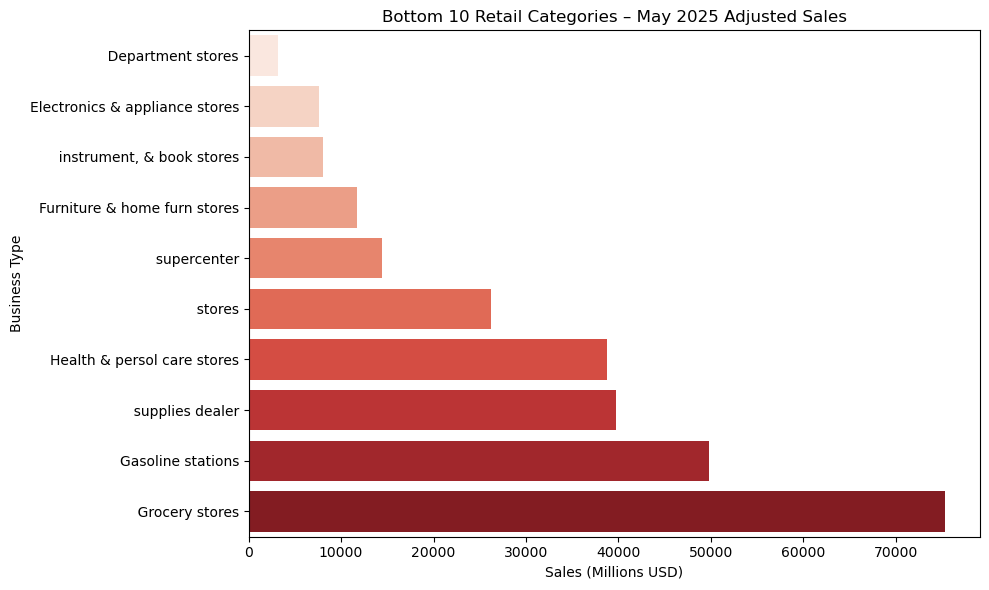

In [6]:
lagging_sales = retail_sheet1[['Business_Type', 'May_2025_SA']].dropna()
lagging_sales = lagging_sales.sort_values(by='May_2025_SA')

# Visualize bottom performers
plt.figure(figsize=(10,6))
sns.barplot(data=lagging_sales.head(10), x='May_2025_SA', y='Business_Type', palette='Reds')
plt.title('Bottom 10 Retail Categories – May 2025 Adjusted Sales')
plt.xlabel('Sales (Millions USD)')
plt.ylabel('Business Type')
plt.tight_layout()
plt.show()

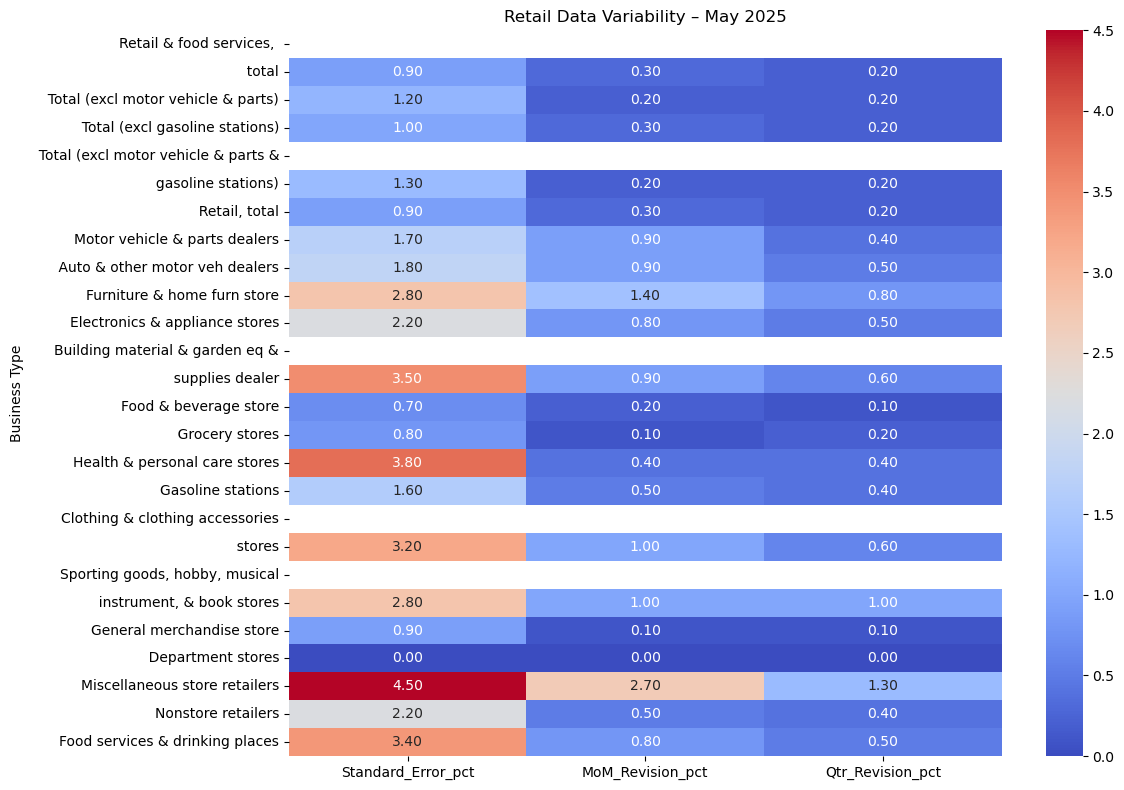

In [7]:
# Check for non-numeric entries in a suspected column
retail_sheet1['May_2025_SA'].unique()

heatmap_df = retail_sheet3[['Business_Type', 'Standard_Error_pct', 'MoM_Revision_pct', 'Qtr_Revision_pct']]
heatmap_df.set_index('Business_Type', inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Retail Data Variability – May 2025')
plt.ylabel('Business Type')
plt.tight_layout()
plt.show()

In [ ]:
# Load Kaggles datasets for segentation
customers = pd.read_csv('/Users/ariba/OneDrive/.../customer_segmentation.csv')
orders = pd.read_csv('/Users/ariba/OneDrive/.../order_segmentation.csv')

# Fix column names correctly
orders.columns = orders.columns.str.strip().str.replace('%', '_pct').str.replace(' ', '_')

# Merge datasets on 'customer' column
merged = pd.merge(orders, customers[['customer']], on='customer', how='left')

merged.head()

,customer,order,total_items,discount_pct,weekday,hour,Food_pct,Fresh_pct,Drinks_pct,Home_pct,Beauty_pct,Health_pct,Baby_pct,Pets_pct,labels,class
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0,5,loyals_fresh
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0,5,loyals_fresh
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0,5,loyals_fresh
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0,7,health_concious
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0,5,loyals_fresh


In [10]:
print(merged.columns.tolist())

['customer', 'order', 'total_items', 'discount_pct', 'weekday', 'hour', 'Food_pct', 'Fresh_pct', 'Drinks_pct', 'Home_pct', 'Beauty_pct', 'Health_pct', 'Baby_pct', 'Pets_pct', 'labels', 'class']


In [15]:
# Aggregate order-level behavior by customer
hybrid = merged.groupby('customer').agg({
    'total_items': 'mean',
    'discount_pct': 'mean',
    'Food_pct': 'mean',
    'Fresh_pct': 'mean',
    'Drinks_pct': 'mean',
    'Home_pct': 'mean',
    'Beauty_pct': 'mean',
    'Health_pct': 'mean',
    'Baby_pct': 'mean',
    'Pets_pct': 'mean',
    'hour': lambda x: (x >= 18).mean(),      # Evening shopping ratio
    'weekday': lambda x: (x >= 5).mean()     # Weekend shopping ratio
}).reset_index()

In [17]:
hybrid.rename(columns={
    'total_items': 'avg_items_per_order',
    'discount_pct': 'avg_discount_used',
    'hour': 'evening_orders_ratio',
    'weekday': 'weekend_orders_ratio'
}, inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler

features_to_scale = hybrid.drop(columns=['customer'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_to_scale)

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
hybrid['Segment'] = kmeans.fit_predict(X_scaled)

In [23]:
segment_names = {
    0: 'Promo-Hungry Bulk Buyers',
    1: 'Quick Grabbers',
    2: 'Moderate Deal Seekers',
    3: 'Full-Basket Loyals'
}

hybrid['Segment_Label'] = hybrid['Segment'].map(segment_names)

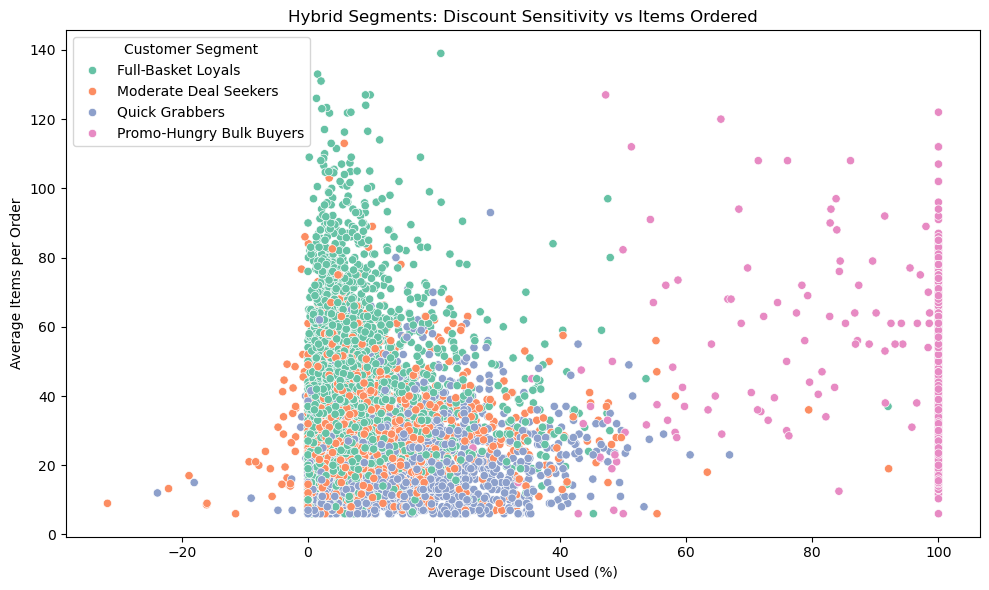

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=hybrid,
    x='avg_discount_used',
    y='avg_items_per_order',
    hue='Segment_Label',
    palette='Set2'
)
plt.title('Hybrid Segments: Discount Sensitivity vs Items Ordered')
plt.xlabel('Average Discount Used (%)')
plt.ylabel('Average Items per Order')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

## Predictive Modeling

In [31]:
# Prepare Data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Target: labeled segment
y = hybrid['Segment_Label']

# Features: drop non-predictive fields
X = hybrid.drop(columns=['customer', 'Segment', 'Segment_Label'])

In [32]:
# Train and Test Splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
# Model Fit
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Model Performance Evaluation
y_pred = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[727  10   1   5]
 [ 16 555   1  10]
 [  2   0  77   0]
 [  8  12   0 431]]

Classification Report:
                           precision    recall  f1-score   support

      Full-Basket Loyals       0.97      0.98      0.97       743
   Moderate Deal Seekers       0.96      0.95      0.96       582
Promo-Hungry Bulk Buyers       0.97      0.97      0.97        79
          Quick Grabbers       0.97      0.96      0.96       451

                accuracy                           0.96      1855
               macro avg       0.97      0.97      0.97      1855
            weighted avg       0.96      0.96      0.96      1855



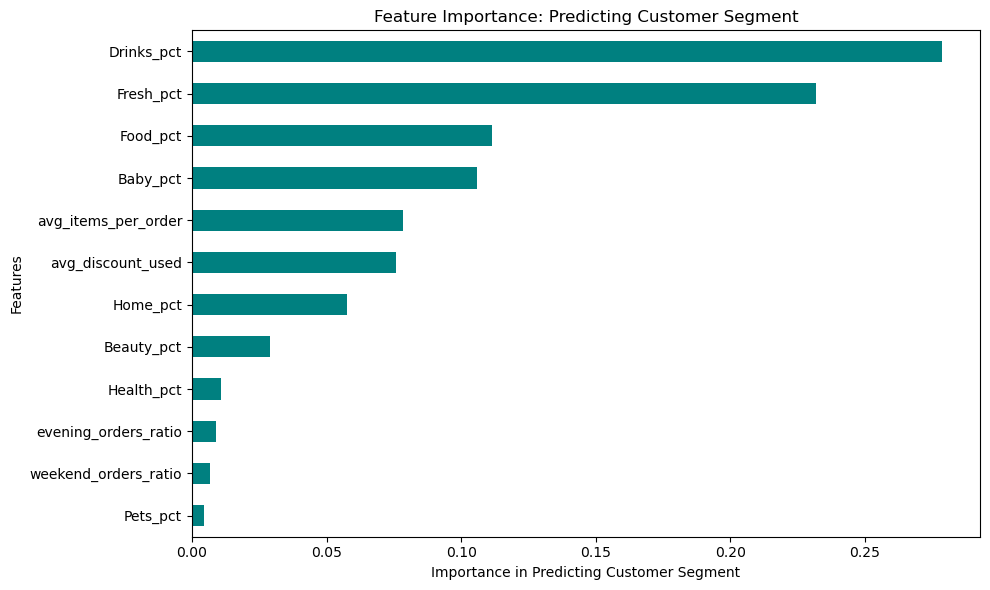

In [38]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10,6))
importances.plot(kind='barh', color='teal')
plt.title('Feature Importance: Predicting Customer Segment')
plt.xlabel('Importance in Predicting Customer Segment')
plt.ylabel('Features')
plt.tight_layout()
plt.show()